In [1]:
import numpy as np
import random

import pollution

import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio.v2 as imageio
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick
import ipywidgets as widgets
from scipy.optimize import minimize_scalar, minimize
from matplotlib.lines import Line2D

font = {        'size'   : 20}
params = {'figure.figsize': (10, 5),
          'font.family':'sans-serif',
          'font.sans-serif':'Nimbus Sans'}
mpl.rc('font', **font)
plt.rcParams.update(params)

In [2]:
L = 30
phi=5
M=5
N=20
D=10
R=5
mu=0.5
world = pollution.World(L=L,N=N,D=D,phi=5,R=R,M_nu=0,epsilon=0,mu=mu)

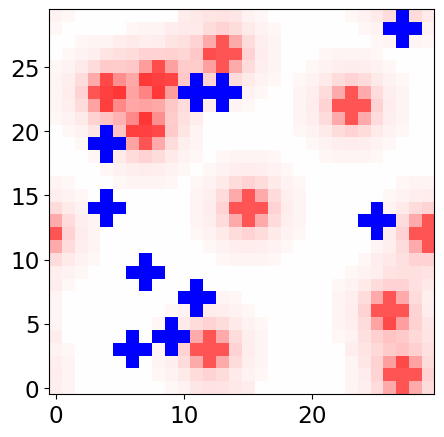

In [8]:
im=plt.imshow(world.pollution_grid.transpose(),cmap='bwr',vmin=-1.5,vmax=1.5,origin='lower')

In [27]:
for a in world.agents:
#     if a.type=='c':
    print(a.label,a.position)

9 (13, 26)
8 (23, 22)
17 (25, 13)
1 (15, 14)
6 (7, 20)
2 (4, 23)
11 (11, 23)
3 (12, 3)
15 (9, 4)
14 (7, 9)
4 (27, 1)
5 (8, 24)
19 (4, 14)
16 (13, 23)
18 (11, 7)
10 (26, 6)
13 (27, 28)
7 (29, 12)
12 (4, 19)
20 (6, 3)


In [28]:
world.return_agent(20)[0].position=(26,5)
# world.return_agent(6)[0].position=(17,2)
world.pollute()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


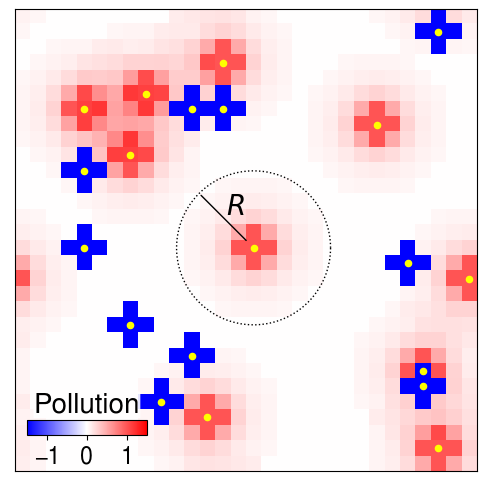

In [33]:
x_a = [a.position[0] for a in world.agents]
y_a = [a.position[1] for a in world.agents]
fig,ax=plt.subplots(figsize=(6,6))
im=ax.imshow(world.pollution_grid.transpose(),cmap='bwr',vmin=-1.5,vmax=1.5,origin='lower')
pos_d = world.return_agent(1)[0].position

pos=ax.get_position()
cax=fig.add_axes([pos.xmin+0.02,pos.ymin+0.06,0.2,0.025])
cb=fig.colorbar(im,cax=cax,orientation='horizontal')
cax.set_title('Pollution',size='medium',
              bbox=dict(facecolor='white', alpha=0.9, 
                        edgecolor='none', boxstyle='round',pad=0.01))
# for a in world.agents:
#     ax.text(a.position[0],a.position[1],a.label,ha='center',va='center',size=10)
ax.scatter(x_a,y_a,marker='o',color='yellow',s=20)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

theta=np.linspace(0,2*math.pi,200)
ax.plot(pos_d[0]+R*np.cos(theta),pos_d[1]+R*np.sin(theta),'k:',lw=1)
ax.annotate('',xy=(pos_d[0]+np.cos(3*math.pi/4)/2,pos_d[1]+np.sin(3*math.pi/4)/2),
            xytext=(pos_d[0]+R*np.cos(3*math.pi/4),
                    pos_d[1]+R*np.sin(3*math.pi/4)),
            arrowprops=dict(arrowstyle='-',lw=1))
ax.text(pos_d[0]+R*np.cos(3*math.pi/4)/2,pos_d[1]+R*np.sin(3*math.pi/4)/2,'$R$',ha='left',va='bottom',size='medium')
# ax.arrow(14,13,10*np.cos(3*math.pi/4),10*np.sin(3*math.pi/4),length_includes_head=True)#[14,14+10*np.cos(3*math.pi/4)],[13,13+10*np.cos(3*math.pi/4)])

ax.set_xlim([-0.5,29.5])
ax.set_ylim([-0.5,29.5])

fig.savefig('Intuition a1.eps', format='eps',bbox_inches='tight',dpi=300)

In [83]:
print({a.label:a.position for a in world.agents})

{5: (22, 3), 8: (27, 26), 6: (12, 1), 20: (20, 5), 16: (4, 18), 15: (10, 5), 19: (14, 29), 10: (9, 24), 2: (8, 23), 9: (14, 14), 13: (21, 23), 1: (5, 10), 11: (25, 8), 12: (28, 27), 7: (25, 15), 17: (5, 28), 18: (3, 15), 3: (1, 20), 4: (22, 29), 14: (24, 6)}


In [11]:
import copy

In [53]:
L = 50
phi=5
N=80
D=2*N//5
R=5
mu=0.5
world = pollution.World(L=L,N=N,D=D,phi=5,R=R,M_nu=1,epsilon=0,mu=mu)
time_lapse = [0]*13
time_lapse[0]=copy.deepcopy(world)
for t in range(12):
    world.step()
    time_lapse[t+1] = copy.deepcopy(world)

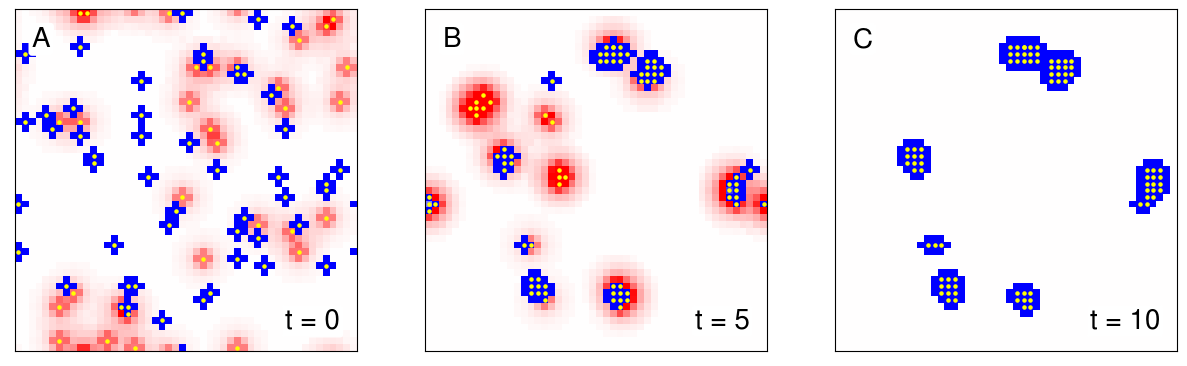

In [58]:
fig,axs=plt.subplots(ncols=3,figsize=(15,6),subplot_kw=dict(box_aspect=1))
letters=['A','B','C']
for i in range(3):
    im=axs[i].imshow(time_lapse[i*5].pollution_grid.transpose(),cmap='bwr',vmin=-2,vmax=2,origin='lower')
    x_a = [a.position[0] for a in time_lapse[i*5].agents]
    y_a = [a.position[1] for a in time_lapse[i*5].agents]
    axs[i].scatter(x_a,y_a,marker='o',color='yellow',s=5)
    # for a in world.agents:
    #     ax.text(a.position[0],a.position[1],a.label,ha='center',va='center',size=6)
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)
    axs[i].set_xlim([-0.5,L-0.5])
    axs[i].set_ylim([-0.5,L-0.5])
    axs[i].text(2,47,letters[i],va='top',ha='left',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'))
    axs[i].text(47,2,f't = {i*5}',va='bottom',ha='right',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'))
fig.savefig("snapshots.eps",bbox_inches='tight',format='eps')

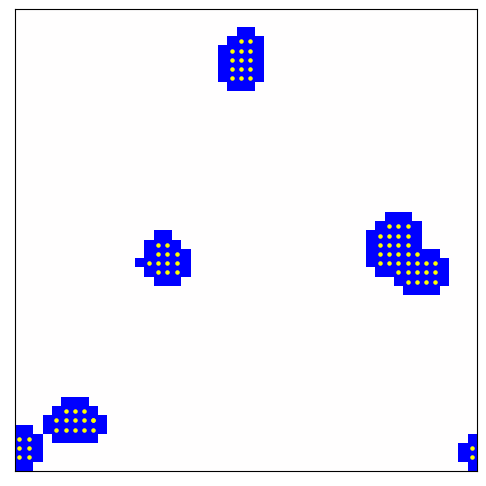

In [6]:
fig,ax=plt.subplots(figsize=(15,6))
for t in range(16):
    if t%5==0:
        ax.clear()
        im=ax.imshow(world.pollution_grid.transpose(),cmap='bwr',vmin=-2,vmax=2,origin='lower')
        x_a = [a.position[0] for a in world.agents]
        y_a = [a.position[1] for a in world.agents]
        ax.scatter(x_a,y_a,marker='o',color='yellow',s=5)
        # for a in world.agents:
        #     ax.text(a.position[0],a.position[1],a.label,ha='center',va='center',size=6)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_xlim([-0.5,L-0.5])
        ax.set_ylim([-0.5,L-0.5])

        fig.savefig(f'Intuition c{t}.png',bbox_inches='tight')
    world.step()

# social dilemma

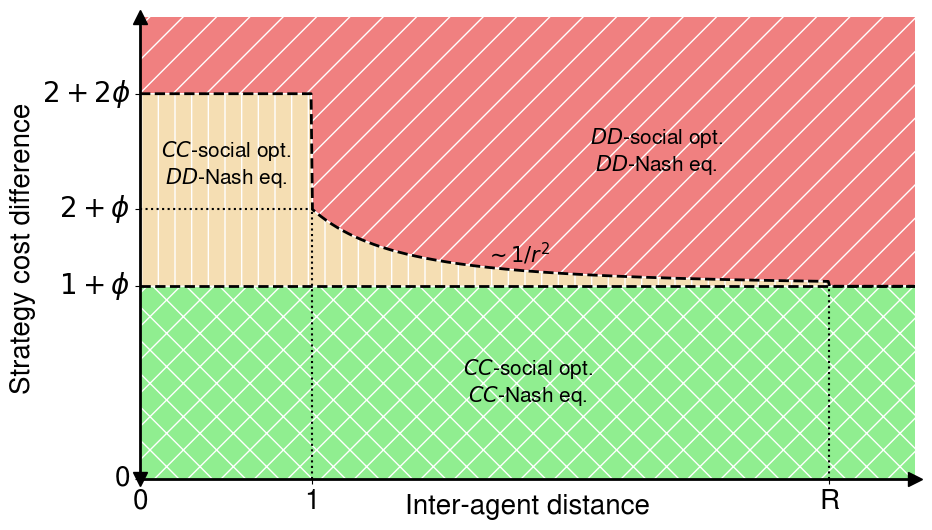

In [8]:
phi = 1.5
R = 4
r = np.linspace(0,8,1000)
defection_dom = (1+phi)*np.ones_like(r)
social_opt = 2*(1+phi)*np.ones_like(r)
social_opt[(r>1)] = defection_dom[(r>1)] + 1/r[(r>1)]**2
social_opt[r>R] = defection_dom[r>R]

fig,ax=plt.subplots(figsize=(10,6))
# bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2',alpha=0.8)

ax.plot(r,defection_dom,c='k',lw=2,ls='--')
ax.plot(r,social_opt,c='k',lw=2,ls='--')

ax.plot([0,1],[2+phi]*2,c='k',ls=':')
ax.plot([1]*2,[0,2+phi],c='k',ls=':')
ax.plot([R]*2,[0,1+phi],c='k',ls=':')

ax.set_xlim([0,R+0.5])
# ax.set_ylim([phi,3+2*phi])
ax.set_ylim([0,3+2*phi])

ax.set_xticks([0,1,R])
ax.set_yticks([0,1+phi,2+phi,2+2*phi])
ax.set_xticklabels([0,1,'R'])
ax.set_yticklabels([0,r'$1+\phi$',r'$2+\phi$',r'$2+2\phi$'],va='center')

# ax.set_yticks([1,2,3,4])
# ax.set_yticklabels(['',r'$1+\phi$',r'$2+\phi$',r'$2+2\phi$'],rotation=90,va='center')

# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['',1,2,'','R',''])
# ax.tick_params(axis='x',direction='in',pad=-30)

ax.set_xlabel('Inter-agent distance',va='bottom')
ax.set_ylabel('Strategy cost difference')

ax.fill_between([0,8],[1+phi]*2,color='lightgreen',
                hatch='X',edgecolor="w")#,alpha=0.2)
ax.fill_between(r,social_opt,[4+2*phi]*len(r),color='lightcoral',
                hatch='/',edgecolor="w")#,alpha=0.2)
ax.fill_between(r,social_opt,defection_dom,color='wheat',
                hatch='|',edgecolor="w")#,alpha=0.2)

ax.text(2,1.25+phi,r'$\sim 1/r^2$',fontsize=15,va='bottom',ha='left')
ax.text((0.5+R)/2,phi/2+0.5,'$CC$-social opt.\n$CC$-Nash eq.',ha='center',
        va='center',fontsize=15)
ax.text(0.5,1.5+1.5*phi,'$CC$-social opt.\n$DD$-Nash eq.',ha='center',
        va='bottom',fontsize=15)
ax.text((2+R)/2,(4+3*phi)/2,'$DD$-social opt.\n$DD$-Nash eq.',ha='center',
        va='center',fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set(lw=2)
ax.spines['bottom'].set(lw=2)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
fig.savefig("social dilemma phase diag.eps",bbox_inches='tight',format='eps')